In [1]:
from sqlalchemy import create_engine
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
%pylab inline

MasterPBA = pandas.read_csv("MasterPBA_Clean.csv")

Populating the interactive namespace from numpy and matplotlib


C:\Users\john.wang\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (28,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Function to print all rows.
Function to provide descriptive statistics.

In [2]:
def print_full(column):
    pandas.set_option('display.max_rows', len(column))
    pandas.set_option('display.max_columns', 10000)
    print(column)
    pandas.reset_option('display.max_rows')
    pandas.reset_option('display.max_columns')
    
def descriptive_stats(column):
    print "Descriptive Stats of {}".format(column)
    print "Count: {}".format(MasterPBA[column].count())
    print "Mean: {}".format(MasterPBA[column].mean())
    print "Variance: {}".format(MasterPBA[column].var())
    print "Std: {}".format(MasterPBA[column].std())
    print "Min: {}".format(MasterPBA[column].min())
    print "25%: {}".format(MasterPBA[column].quantile(.25))
    print "50%: {}".format(MasterPBA[column].median())
    print "75%: {}".format(MasterPBA[column].quantile(.75))
    print "Max: {}".format(MasterPBA[column].max())
    IQR = MasterPBA[column].quantile(.75)-MasterPBA[column].quantile(.25)
    print "IQR: {}".format(IQR)
    print "Range: {}".format(MasterPBA[column].max()-MasterPBA[column].min())
    UFence = MasterPBA[column].quantile(.75)+1.5*IQR
    LFence = MasterPBA[column].quantile(.25)-1.5*IQR
    Outliers = len(MasterPBA[(MasterPBA[column] > UFence) & (MasterPBA[column] < LFence)])
    print "Outlier Count: {}".format(Outliers)
    print 

# Variable Identification

Distinguishing whether variables are categorical variables or numeric variables which will subsequently influence how they are further analyzed.

In [3]:
Categorical = []
Numeric = []
for i in MasterPBA.columns.values:
    if MasterPBA[i].dtypes == object:
        Categorical.append(i)
    elif i in ["bid id", "With Comp", "With Truck", "Price Cust #", "CUSTOMER NUMBER", "IS_REPRICE"]:
        Categorical.append(i)
    else:
        Numeric.append(i)
print "Categorical Variables: "
print pandas.Series(Categorical)
print 
print "Numeric Variables: "
print pandas.Series(Numeric)


Categorical Variables: 
0                       bid id
1                        LN ID
2                 OriginMarket
3                   DestMarket
4                       O City
5                       D City
6                  Awarded Y/N
7                    With Comp
8                   With Truck
9                         O ST
10                        D ST
11                       D Zip
12                     EQ Type
13                      O Ramp
14                  O MKT Ramp
15                      D Ramp
16                  D MKT Ramp
17                         Fee
18                 Rate Status
19    Cust Fuel Type 1 (PM/RP)
20                    Haz Flag
21                Price Cust #
22                     Segment
23                 Method Used
24               CUSTOMER_NAME
25            DATE_AWARD_START
26                     Network
27                  IS_REPRICE
28                Past_Awarded
29                      Market
30                        Ramp
31             

# Univariate Analysis 

### Numeric Variables

Providing Descriptive Statistics for all numeric variables.

In [4]:
for column in Numeric:
    descriptive_stats(column)

Descriptive Stats of Unnamed: 0
Count: 13293
Mean: 6646.0
Variance: 14726428.5
Std: 3837.50289902
Min: 0
25%: 3323.0
50%: 6646.0
75%: 9969.0
Max: 13292
IQR: 6646.0
Range: 13292
Outlier Count: 0

Descriptive Stats of AverageOTRMiles
Count: 13293
Mean: 1705.21390621
Variance: 598245.721791
Std: 773.463458601
Min: 571.0
25%: 1059.0
50%: 1553.0
75%: 2601.22222222
Max: 3056.5
IQR: 1542.22222222
Range: 2485.5
Outlier Count: 0

Descriptive Stats of AverageOTRRate
Count: 13293
Mean: 1.18242550307
Variance: 0.0359416453861
Std: 0.189582819333
Min: 0.79
25%: 1.01
50%: 1.17375
75%: 1.29428571429
Max: 1.92625
IQR: 0.28428571429
Range: 1.13625
Outlier Count: 0

Descriptive Stats of AverageIMLRate
Count: 13293
Mean: 0.78237306505
Variance: 0.0694920757103
Std: 0.263613496829
Min: 0.340279075771
25%: 0.538070554185
50%: 0.759920730285
75%: 0.932660692627
Max: 1.61286698687
IQR: 0.394590138442
Range: 1.2725879111
Outlier Count: 0

Descriptive Stats of AverageIMLMiles
Count: 13293
Mean: 1732.35117626
V

C:\Users\john.wang\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AF9CE80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B29D128>]], dtype=object)

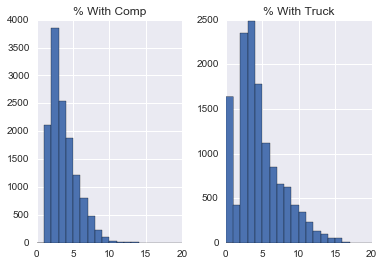

In [5]:
MasterPBA[["% With Truck", "% With Comp"]].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

### Categorical Variables

Providing Visualizations of categorical variables that will not necessarily be removed during the modeling process

CN    13293
Name: EQ Type, dtype: int64


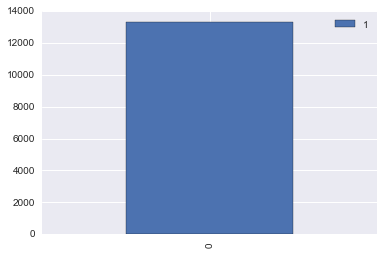

In [6]:
print_full(MasterPBA["EQ Type"].value_counts())
pandas.DataFrame([MasterPBA["EQ Type"].unique(),pandas.Series(MasterPBA["EQ Type"].value_counts())]).transpose().plot.bar()

NRFLKCHGO     538
BUFFCHGO      378
HUSTNCHGO     364
STKTNCHLTE    340
HUSTNLOSAN    314
NRFLKDALAS    308
TUCCHGO       306
LOSANBOST     298
KANCYERAIL    296
PHILASTKTN    278
DALASJACVL    278
ATLASTPAU     264
STKTNKANCY    262
HBGSTPAU      250
DALASCHLTE    248
HBGMIAMI      230
MEMPHCHLTE    222
HUSTNSTKTN    220
STPAUDALAS    206
DALASPHILA    175
KANCYPHILA    174
HBGPORTL      174
BUFFLOSAN     170
BOSTSTKTN     170
ALBNYLOSAN    166
STKTNBOST     164
STPAUCHLTE    162
SEATLHBG      160
ELPASCHGO     156
ERAILBHAM     144
MEMPHSALAC    140
HBGSEATL      126
SEATLMEMPH    126
DALASSTPAU    126
BUFFSTKTN     124
SEATLSTKTN    120
PORTLHBG      114
LOSANSTPAU    110
SALACLOSAN    108
DALASNRFLK    105
KANCYSALAC    104
PHILAPORTL    102
ERAILPORTL    100
ERAILCHLTE     98
CHLTESTPAU     96
LOSANMIAMI     96
ERAILSTPAU     94
TUCATLA        94
LOSANALBNY     92
CHGOBUFF       91
STLOUPHILA     90
STLOUMIAMI     90
TUCHBG         88
STKTNSTPAU     88
ERAILSALAC     86
STKTNNRFLK

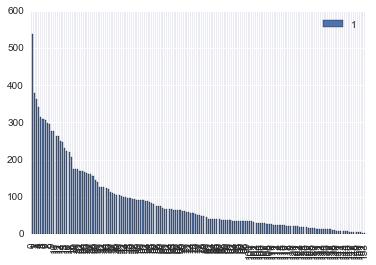

In [7]:
print_full(MasterPBA["Market"].value_counts())
pandas.DataFrame([MasterPBA["Market"].unique(),pandas.Series(MasterPBA["Market"].value_counts())]).transpose().plot.bar()

NRFLKCHGO     538
BUFFCHGO      378
HUSTNCHGO     364
STKTNCHLTE    340
HUSTNLOSAN    314
NRFLKDALAS    308
TUCCHGO       306
LOSANBOST     298
KANCYERAIL    296
DALASJACVL    278
PHILASTKTN    278
ATLASTPAU     264
STKTNKANCY    262
HBGSTPAU      250
DALASCHLTE    248
HBGMIAMI      230
MEMPHCHLTE    222
HUSTNSTKTN    220
STPAUDALAS    206
DALASPHILA    175
KANCYPHILA    174
HBGPORTL      174
BUFFLOSAN     170
BOSTSTKTN     170
ALBNYLOSAN    166
STKTNBOST     164
STPAUCHLTE    162
SEATLHBG      160
ELPASCHGO     156
ERAILBHAM     144
MEMPHSALAC    140
SEATLMEMPH    126
DALASSTPAU    126
HBGSEATL      126
BUFFSTKTN     124
SEATLSTKTN    120
PORTLHBG      114
LOSANSTPAU    110
SALACLOSAN    108
DALASNRFLK    105
KANCYSALAC    104
PHILAPORTL    102
ERAILPORTL    100
ERAILCHLTE     98
CHLTESTPAU     96
LOSANMIAMI     96
ERAILSTPAU     94
TUCATLA        94
LOSANALBNY     92
CHGOBUFF       91
STLOUMIAMI     90
STLOUPHILA     90
TUCHBG         88
STKTNSTPAU     88
ERAILSALAC     86
STKTNNRFLK

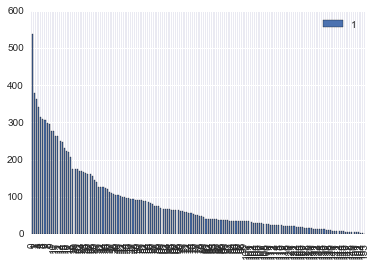

In [8]:
print_full(MasterPBA["Ramp"].value_counts())
pandas.DataFrame([MasterPBA["Ramp"].unique(), pandas.Series(MasterPBA["Ramp"].value_counts())]).transpose().plot.bar()

TXCA    514
NYCA    416
CAMA    314
VAIL    264
VATX    246
CANC    244
TXNC    221
NYIL    212
TXIL    204
GAMN    194
TXFL    186
CAMN    186
MNTX    182
PAWA    164
NJCA    152
PAFL    146
NJWA    146
PACA    130
PAMN    124
CAFL    121
TXOH    118
WACA    116
VAWI    114
TXMN    112
MACA    111
TXPA    110
AZIL    108
UTCA    106
WAPA    106
MNFL    104
CAVA    100
CANY     99
TXVA     99
PAOR     98
NJMN     98
CAKS     92
NJUT     92
MNNC     89
CACT     88
AZOH     86
CAMO     82
VAMN     80
TXIN     80
AZPA     79
NYTX     78
NYWA     77
TNNC     76
TXGA     74
NYWI     72
ORPA     72
AZGA     72
MSNC     68
MDMN     68
NCTX     66
MONJ     65
TXMI     64
TXWI     64
TXNJ     63
NCMN     60
VAMI     60
FLCA     60
GACO     58
CASC     56
NYAL     56
TXSC     56
ARNC     56
ALMN     54
VAWA     54
TNFL     52
WINY     52
WATN     52
AZIN     52
ILFL     50
MOUT     50
MSIL     50
MNAZ     50
WAVA     50
NJAL     48
ALTX     46
TNUT     46
NCIL     46
NJOR     46
KSNJ     46
KSMA

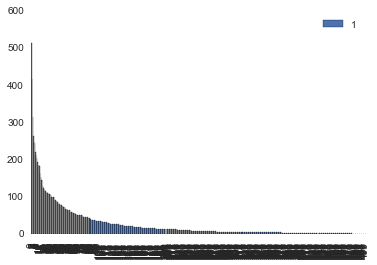

In [9]:
print_full(MasterPBA["STPAIR"].value_counts())
pandas.DataFrame([MasterPBA["STPAIR"].unique(), pandas.Series(MasterPBA["STPAIR"].value_counts())]).transpose().plot.bar()

Segment588    281
Segment236    270
Segment431    263
Segment234    248
Segment565    246
Segment244    225
Segment716    197
Segment727    186
Segment549    183
Segment157    173
Segment20     172
Segment80     165
Segment330    162
Segment500    162
Segment470    158
Segment79     157
Segment590    142
Segment350    142
Segment351    136
Segment160    136
Segment139    133
Segment334    133
Segment671    131
Segment766    130
Segment665    128
Segment81     128
Segment720    123
Segment547    114
Segment456    111
Segment669    111
Segment464    110
Segment145    102
Segment283    101
Segment502    100
Segment767    100
Segment247     98
Segment136     94
Segment395     94
Segment24      88
Segment771     79
Segment463     78
Segment138     78
Segment481     77
Segment349     76
Segment392     74
Segment146     73
Segment111     72
Segment427     71
Segment465     71
Segment725     70
Segment490     69
Segment220     69
Segment417     68
Segment484     68
Segment474     68
Segment553

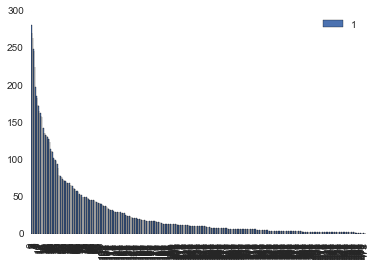

In [10]:
print_full(MasterPBA["Segment"].value_counts())
pandas.DataFrame([MasterPBA["Segment"].unique(),pandas.Series(MasterPBA["Segment"].value_counts())]).transpose().plot.bar()

Pricing Method 2    13150
Name: Method Used, dtype: int64


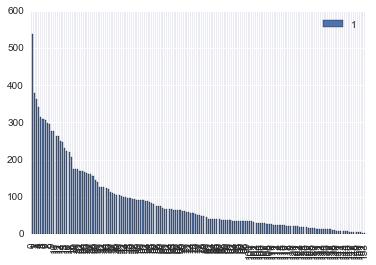

In [11]:
print_full(MasterPBA["Method Used"].value_counts())
pandas.DataFrame([MasterPBA["Market"].unique(),pandas.Series(MasterPBA["Market"].value_counts())]).transpose().plot.bar()

FULL NETWORK       11947
PARTIAL NETWORK     1285
EVENT                 61
Name: Network, dtype: int64


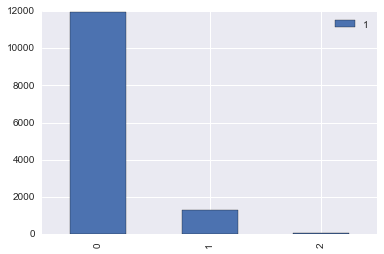

In [12]:
print_full(MasterPBA["Network"].value_counts())
pandas.DataFrame([MasterPBA["Network"].unique(),pandas.Series(MasterPBA["Network"].value_counts())]).transpose().plot.bar()

Yes    6836
No     6457
Name: Past_Awarded, dtype: int64


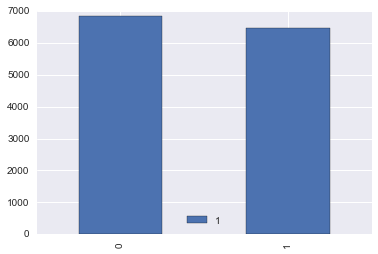

In [14]:
print_full(MasterPBA["Past_Awarded"].value_counts())
pandas.DataFrame([MasterPBA["Past_Awarded"].unique(),pandas.Series(MasterPBA["Past_Awarded"].value_counts())]).transpose().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015C1BF28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015FEB9E8>]], dtype=object)

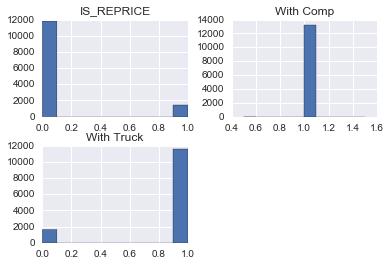

In [15]:
MasterPBA[["With Truck", "With Comp", "IS_REPRICE"]].hist()

# Bivariate/Multivariate Analysis

Producing the equivalent data for a scatterplot matrix without the lag for variables that have a strong correlation whether in the positive or negative direction.

In [16]:
a = MasterPBA.dropna(axis=1)
for i in range(0,len(a.corr().unstack())):
    if abs(a.corr().unstack()[i]) > .6:
        print a.corr().unstack()[[i]]


Unnamed: 0  Unnamed: 0    1.0
dtype: float64
bid id  bid id    1.0
dtype: float64
bid id  DOE 1   -0.694404
dtype: float64
bid id  fuelpct   -0.698315
dtype: float64
AverageOTRMiles  AverageOTRMiles    1.0
dtype: float64
AverageOTRMiles  AverageIMLMiles    0.861631
dtype: float64
AverageOTRMiles  Miles    0.854094
dtype: float64
AverageOTRMiles  LHL    0.64559
dtype: float64
AverageOTRMiles  BAverageHubRevenue_Comp   -0.607
dtype: float64
AverageOTRMiles  BAverageMiles    0.859923
dtype: float64
AverageOTRRate  AverageOTRRate    1.0
dtype: float64
AverageOTRRate  AverageIMLRate    0.79571
dtype: float64
AverageOTRRate  BAverageCompRate    0.714287
dtype: float64
AverageIMLRate  AverageOTRRate    0.79571
dtype: float64
AverageIMLRate  AverageIMLRate    1.0
dtype: float64
AverageIMLRate  BAverageCompRate    0.857247
dtype: float64
AverageIMLRate  BAverageHubCost    0.70303
dtype: float64
AverageIMLMiles  AverageOTRMiles    0.861631
dtype: float64
AverageIMLMiles  AverageIMLMiles    1.0
d

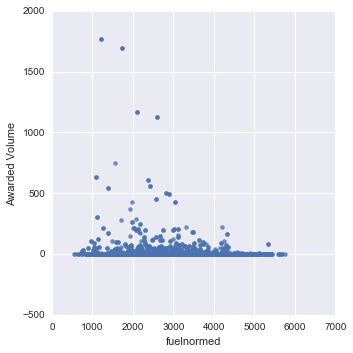

In [17]:
# print_full(MasterPBA.columns.values)
seaborn.lmplot("fuelnormed", "Awarded Volume", data=MasterPBA, fit_reg=False)
seaborn.plt.show()

In [18]:
seaborn.lmplot("NumberofComps", "AverageCompRate", data=MasterPBA, fit_reg=False)
seaborn.plt.show()

KeyError: "['AverageCompRate' 'NumberofComps'] not in index"

In [ ]:
MasterPBA[["AverageOTRMiles", "AverageOTRRate", "AverageIMLRate", "AverageIMLMiles"]].hist()    